In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

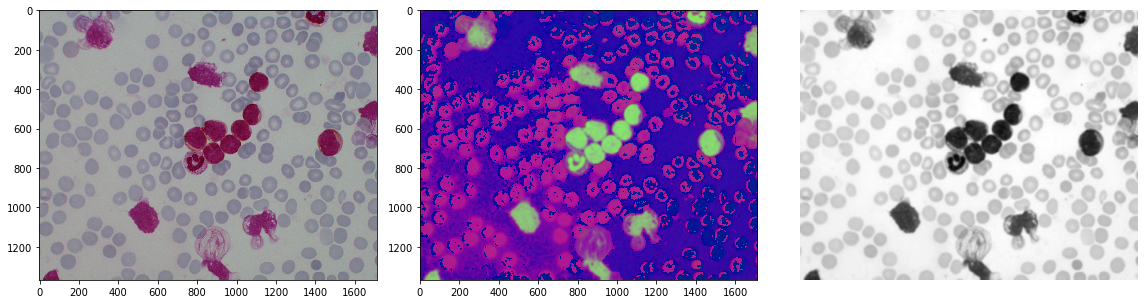

In [40]:
image = cv.imread('im/Im001_1.jpg')
# image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
blurred_frame = cv.GaussianBlur(image, (25, 25), 0)
frame_hsv = cv.cvtColor(blurred_frame, cv.COLOR_BGR2HSV)
frame_gray = cv.cvtColor(blurred_frame, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.subplot(132)
plt.imshow(frame_hsv, cmap='gray', interpolation='nearest')
plt.subplot(133)
plt.imshow(frame_gray, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

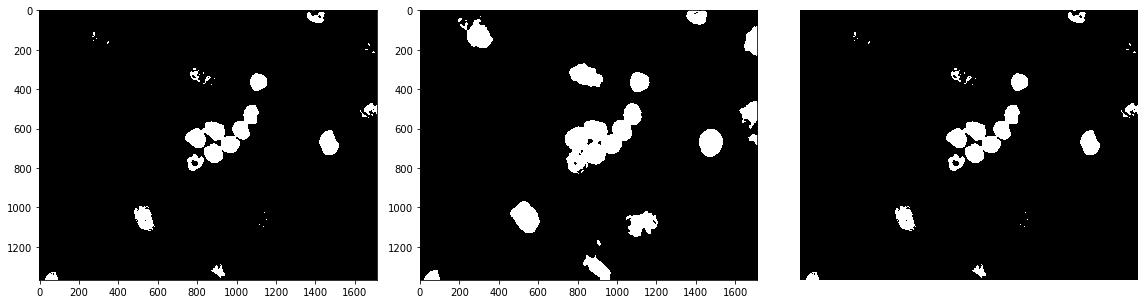

In [42]:
mask = cv.inRange(frame_hsv, (126, 174, 0), (140, 255, 255))

_, contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv.drawContours(image, contour, -1, (0, 255, 0), 3)

_, frame_threshold = cv.threshold(frame_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
frame_open = cv.morphologyEx(frame_threshold, cv.MORPH_OPEN, kernel)

frame_result = cv.bitwise_and(mask, frame_open)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.subplot(132)
plt.imshow(frame_open, cmap='gray', interpolation='nearest')
plt.subplot(133)
plt.imshow(frame_result, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

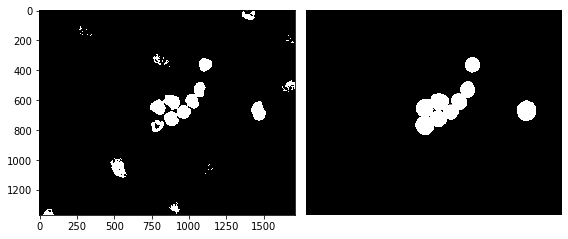

In [39]:
frame_truth = cv.imread('im/Im001_1_gt.jpg')

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(frame_result, cmap='gray', interpolation='nearest')
plt.subplot(122)
plt.imshow(frame_truth, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()